### CNN을 활용한  Fashion MNIST  딥러닝  
https://www.tensorflow.org/datasets/catalog/fashion_mnist  
<img src='mnist.jpg' align=left width=300>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import matplotlib.font_manager as fmt

%matplotlib inline

In [2]:
fashion_train_df = pd.read_csv('./dataset/fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('./dataset/fashion-mnist_test.csv', sep=',')

In [3]:
fashion_train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<img src='table.jpg' align=left width=600px>

In [5]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train = np.array(fashion_train_df, dtype='float32')
test = np.array(fashion_test_df, dtype='float32')

In [7]:
train

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
print(len(train))
print(len(test))

60000
10000


In [10]:
train.shape

(60000, 785)

In [11]:
fashion_train_df['label']

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [12]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

26817 번째 이미지 선택
label_index : 8	 class name : Bag


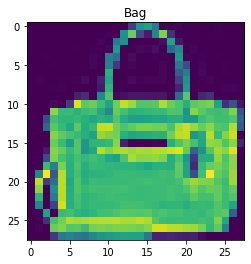

In [13]:
i = random.randint(1,60000)
plt.imshow(train[i, 1:].reshape((28,28)))
label_index = fashion_train_df['label'][i]
plt.title(f'{class_names[label_index]}')

print(i,'번째 이미지 선택')
print('label_index :', label_index, end='')
print('\t class name :', class_names[label_index])

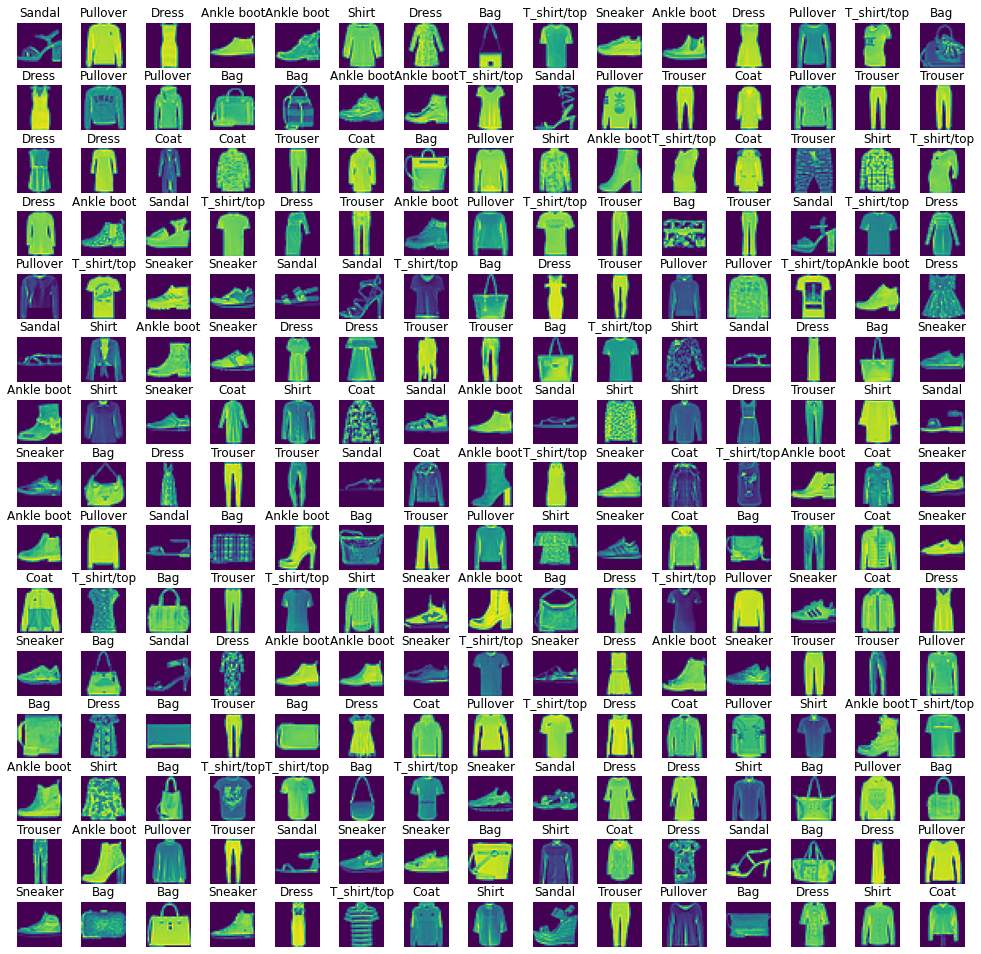

In [14]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(W_grid, L_grid, figsize=(17,17)) 

axes = axes.ravel() # 2차원 타입을 1차원 타입으로 평면화 
n_train = len(train) # 트레이닝 데이터셋의 길이를 n_train에 할당, 60000 이 할당됨  

for i in np.arange(0, W_grid * L_grid):  
    index = np.random.randint(0, n_train)  # 60,000개의 트레이닝 데이터셋 중에서 랜덤 값 선택  

    axes[i].imshow( train[index,1:].reshape((28,28)) )  # 준비된 이미지 28x28(784 pixel)에 적합하게 이미지 출력    
    label_index = fashion_train_df['label'][index]
    axes[i].set_title(f'{class_names[label_index]}', fontsize=12) #이미지 출력 시, label을 출력 
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4, wspace=0.4)

In [15]:
X_train = train[:,1:]/255
Y_train = train[:,0]

x_test = test[:,1:]/255
y_test = test[:,0]

In [16]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

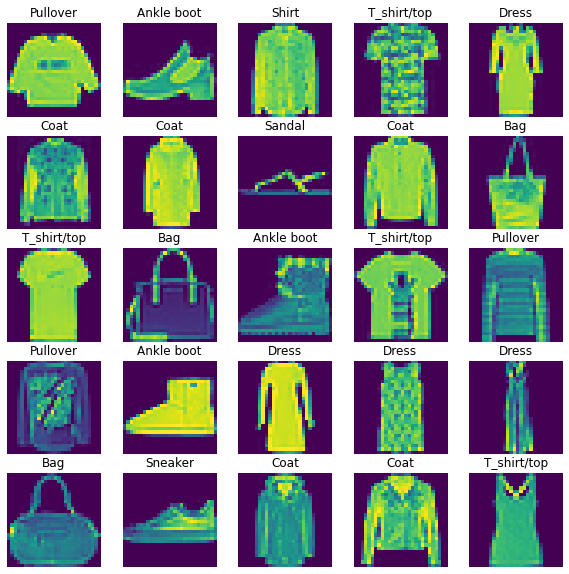

In [17]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train[i].reshape((28,28)))
    label_index = int(Y_train[i])
    plt.title(class_names[label_index])
    plt.axis('off')

In [18]:
font_path = "C:\\Windows\\Fonts\\gulim.ttc" 
font_name = fmt.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name, size=10)

트레이닝 데이터 : ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
트레이닝 데이터 : [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
테스트 데이터 : [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


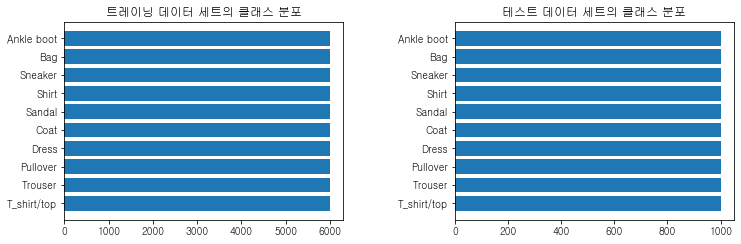

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)  # 좌측 이미지
classes, counts = np.unique(Y_train, return_counts=True)  
# 데이터셋의 신뢰도를 높이려면 클래스들의 분포가 같아야함
plt.barh(class_names, counts)  #수평 막대 플롯 
plt.title('트레이닝 데이터 세트의 클래스 분포')
print("트레이닝 데이터 :", class_names)
print("트레이닝 데이터 :", counts)

plt.subplot(2, 2, 2)
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(class_names, counts)
plt.title('테스트 데이터 세트의 클래스 분포')
print('테스트 데이터 :', counts)
plt.subplots_adjust(wspace=0.4)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, random_state=42)
# split 옵션 안 주면 기본 설정이 75:25

In [22]:
print(len(x_train))
print(len(x_val))

45000
15000


In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(45000, 784)
(45000,)
(15000, 784)
(15000,)


In [24]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

print(x_train.shape)
print(x_val.shape)

(45000, 28, 28, 1)
(15000, 28, 28, 1)


In [25]:
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))

print(x_test.shape)

(10000, 28, 28, 1)


In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


- 
cnn_model.add(BatchNormalization())   
  배치 단위로 활성화 함수의 활성화 값 또는 출력값을 정규화(정규분포: 평균 0, 분산 1)하여 학습 속도를 개선  
-   
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))   
pool_size=(2, 2)는 데이터 크기가 가로 세로 각각 절반으로 줄어들게 하고, MaxPooling2D는 주어진 이미지를 2차원으로 생성    
- 
cnn_model.add(Dropout(0.2))     
20% 드롭아웃으로 과적합을 방지


In [27]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same')) # padding=same 이면 알아서 둘레에 한칸식 추가
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [28]:
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

sparse_categorical_crossentropy 는 다중분류 손실함수로, 
categorical_crossentropy와 동일하지만 레이블링 결과가 one-hot encoding 형태가 아닌Integer type 클래스 일 경우에 사용 할 수 있다.

In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, verbose=1, batch_size=32)

Train on 45000 samples, validate on 15000 samples
Epoch 1/15
45000/45000 [==============================] - 47s 1ms/step - loss: 0.4748 - accuracy: 0.8294 - val_loss: 0.3344 - val_accuracy: 0.8765
Epoch 2/15
45000/45000 [==============================] - 46s 1ms/step - loss: 0.3322 - accuracy: 0.8796 - val_loss: 0.2850 - val_accuracy: 0.8994
Epoch 3/15
45000/45000 [==============================] - 46s 1ms/step - loss: 0.2904 - accuracy: 0.8924 - val_loss: 0.3013 - val_accuracy: 0.8975
Epoch 4/15
45000/45000 [==============================] - 46s 1ms/step - loss: 0.2669 - accuracy: 0.9025 - val_loss: 0.2630 - val_accuracy: 0.9094
Epoch 5/15
45000/45000 [==============================] - 46s 1ms/step - loss: 0.2457 - accuracy: 0.9078 - val_loss: 0.2551 - val_accuracy: 0.9113
Epoch 6/15
45000/45000 [==============================] - 46s 1ms/step - loss: 0.2321 - accuracy: 0.9135 - val_loss: 0.2553 - val_accuracy: 0.9114
Epoch 7/15
45000/45000 [==============================] - 46s 1ms/st

Text(0.5, 1.0, 'Accuracy evolution')

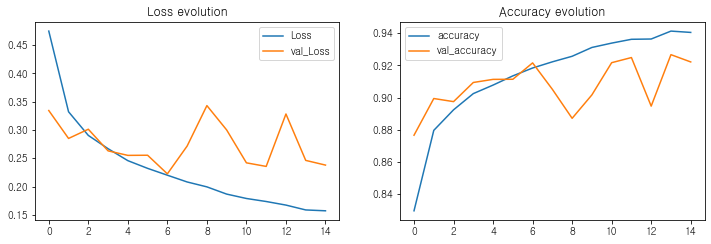

In [31]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [32]:
evaluation = model.evaluate(x_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

10000/10000 [==============================] - 3s 276us/step
Test Accuracy : 0.926


In [33]:
# Test 데이터셋 확인 10,000개 확인 및 테스트
# 측은 10 개의 숫자로 구성된 배열(가장 큰 값이 선택됨)
prediction = model.predict(x_test) 
print("테스트 데이터 개수 : ", len(prediction))
print(prediction[23])

테스트 데이터 개수 :  10000
[2.2242543e-18 1.0000000e+00 1.5336444e-22 1.6788792e-17 1.2967317e-20
 3.8099314e-17 1.4581089e-22 1.7490618e-20 1.1759248e-17 7.4348588e-23]


In [34]:
predicted_classes = model.predict_classes(x_test)  # Test 데이터셋 10,000개 전체를 예측
print(predicted_classes)

[0 1 2 ... 8 8 1]


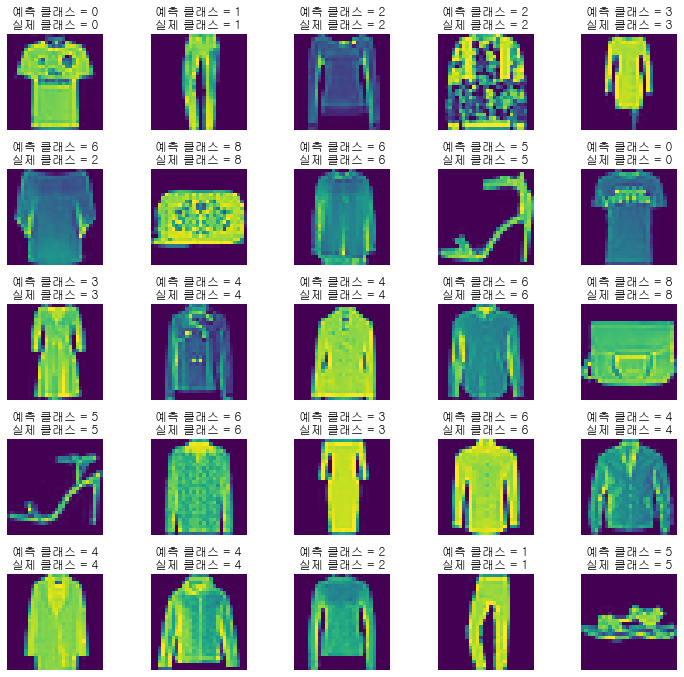

In [35]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()  #ravel()은 평면화된 배열을 반환

for i in np.arange(0, L * W):  # Test 데이터셋 중에서 25개(0~24번) 이미지 출력 
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"예측 클래스 = {predicted_classes[i]}\n실제 클래스 = {int(y_test[i])}")   
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)